# Gradiente

El gradiente es una operación vectorial, que opera sobre una función escalar, para producir un vector cuya magnitud es la máxima razón de cambio de la función en el punto del gradiente y que apunta en la dirección de ese máximo.

https://compilandoconocimiento.com/2016/12/18/gradiente-de-escalar-a-vector/

- ¿A qué “cosa” puedo sacarle la gradiente? A una función escalar. (Las de toda la vida pues).
- ¿Qué significa sacar la gradiente? Es una operación en la que tu obtienes una función vectorial iniciando con una función escalar.

![](https://compilandoconocimiento.files.wordpress.com/2016/12/gradiente.png?w=325&h=177)

- Observa que la gradiente de un campo escalar ∇Φ define un campo vectorial
- De forma geométrica el gradiente es un vector que se encuentra normal (perpendicular) a la curva de nivel en el punto que se está estudiando.

![](https://compilandoconocimiento.files.wordpress.com/2016/12/gradiente-exp.png?w=1000&h=)

https://es.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient

## Derivada Direccional

Una forma equivalente de definir el gradiente es como el único vector que, multiplicado por el vector unitario, da la derivada direccional del campo escalar.

Es la forma en obtener el gradiente para una dirección específica.

![](https://compilandoconocimiento.files.wordpress.com/2016/12/derivada-direccional.png?w=166&h=165)

La derivada direccional se maximiza cuando la dirección del vector coincide con la dirección del gradiente.

## Descenso del gradiente

$$ \theta := \theta - \alpha \nabla f  $$ 

alpha es el "learning rate", ratio de aprendizaje.

Es **importante** que los datos que se ingresen al algoritmo estén escalados. (media cero y desviación estandar uno)

https://www.iartificial.net/gradiente-descendiente-para-aprendizaje-automatico/

http://www.benfrederickson.com/numerical-optimization/

[Descenso del gradiente, Khanacademy.](https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent#:~:text=El%20descenso%20de%20gradiente%20es%20un%20algoritmo%20que%20estima%20num%C3%A9ricamente,genera%20sus%20valores%20m%C3%A1s%20bajos.&text=Adem%C3%A1s%2C%20todo%20lo%20que%20necesita,funci%C3%B3n%2C%20no%20requiere%20ninguna%20f%C3%B3rmula.)

https://www.youtube.com/playlist?list=PL-Ogd76BhmcCO4VeOlIH93BMT5A_kKAXp

In [1]:
from matplotlib import cm # Para manejar colores
import numpy as np
import matplotlib.pyplot as plt

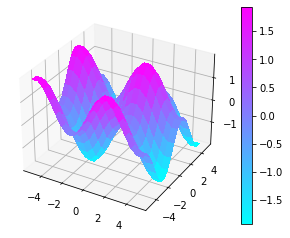

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

def f(x,y):
  return np.sin(x) + np.sin(y)

res = 20
lim = 5

X = np.linspace(-lim, lim, res)
Y = np.linspace(-lim, lim, res)

X, Y = np.meshgrid(X, Y)

Z = f(X,Y) 

# Gráficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool,
                       linewidth=0, antialiased=False)

fig.colorbar(surf)

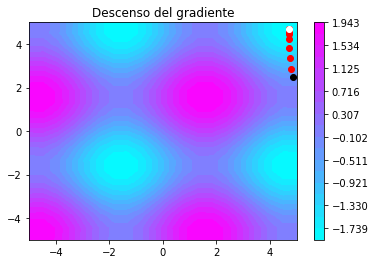

El punto mínimo se encuentra en:  [4.7075425  4.69934067]


In [3]:
def derivate(_p,p):
  return  (f(_p[0],_p[1]) - f(p[0],p[1])) / h


level_map = np.linspace(np.min(Z), np.max(Z),res) 
plt.contourf(X, Y, Z, levels=level_map,cmap=cm.cool)
plt.colorbar()
plt.title('Descenso del gradiente')

# valores aleatorios entre [-4,4]
# p = np.random.rand(2) * 8 - 4
p = np.random.uniform(-lim, lim, 2)

# Punto de inicio
plt.plot(p[0],p[1],'o', c='k')


lr = 0.5 # learning rate
h = 0.01

grad = np.zeros(2)

for i in range(10):
  for idx, val in enumerate(p): 
    _p = np.copy(p)

    _p[idx] = _p[idx] + h

    dp = derivate(_p,p) 

    grad[idx] = dp

  p = p - lr * grad

  # if(i % 10 == 0):
  #   plt.plot(p[0],p[1],'o', c='r')
  plt.plot(p[0],p[1],'o', c='r')

plt.plot(p[0],p[1],'o', c='w')
plt.show()

print("El punto mínimo se encuentra en: ", p)

---
---
---
## DotCSV

In [4]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt 

[-1.7 -0.2]


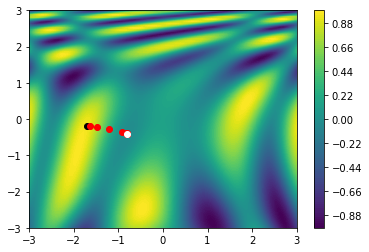

In [5]:
func = lambda th : np.sin(1/2*th[0]**2 - 1/4*th[1]**2 + 3) * np.cos(2*th[0] + 1 - np.e**th[1])

res = 100
lim = 3
_X = np.linspace(-lim, lim, res)
_Y = np.linspace(-lim, lim, res)
_Z = np.zeros((res, res))

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x, y])

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()

# theta = np.random.uniform(-2, 2, 2)
theta = np.array([-1.7, -0.2])
print(theta)

plt.plot(theta[0], theta[1], "o", c="black")

lr = 0.2
h = 0.01

grad = np.zeros(2)

def gradiente(func, theta, h):
    for i, th in enumerate(theta): 
        _theta = np.copy(theta)
        _theta[i] = _theta[i] + h
        grad[i] = (func(_theta) - func(theta))/h
    return grad

for _ in range(10):
    theta = theta - lr * gradiente(func, theta, h)
    plt.plot(theta[0], theta[1], "o", c="red")

plt.plot(theta[0], theta[1], "o", c="white")


### Aplicando el descenso del gradiente a una función lineal

https://www.ellaberintodefalken.com/2019/03/regresion-lineal-descenso-de-gradiente.html

https://www.codificandobits.com/blog/regresion-lineal/

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

#### Función de coste

$$ ECM = \frac{1}{n} \sum_{i=1}^n (y_\text{hipotesis} - y_i)^2 $$

<!-- $$ ECM = \frac{1}{n} \sum_{i=1}^n (h(x_i) - y_i)^2 $$ -->

$$ ECM = \frac{1}{n} \sum_{i=1}^n ((m*x_i + b) - y_i)^2 $$

#### Derivadas parciales

$$ \frac{\partial (ECM)}{\partial m} = \frac{2}{n} \sum_{i=1}^n (m*x_i + b - y_i) (x_i) = \frac{2}{n} \sum_{i=1}^n (y_\text{hipotesis} - y_i) (x_i)$$

$$ \frac{\partial (ECM)}{\partial b} = \frac{2}{n} \sum_{i=1}^n (m*x_i + b - y_i) = \frac{2}{n} \sum_{i=1}^n (y_\text{hipotesis} - y_i)$$


m = 8.602182403550326, b =-31.4905288199589


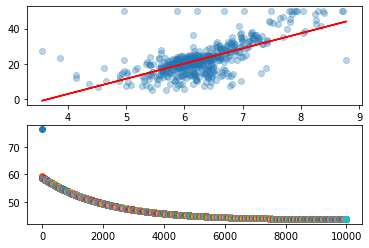

In [7]:
# average number of rooms per dwelling
X = boston.data[:,5]
Y = boston.target

# en "theta" se guarda [m, b]
# los inicio con valores cualquiera

theta = np.array([0,0]) 
lr = 0.01
grad = np.zeros(2)

tamano = len(X)

def coste(m, b):
    error = 0
    for i in range(tamano):
        hipotesis = m*X[i]+b
        error += (hipotesis - Y[i])**2
    return error/tamano

def gradiente(m, b):
    m_sum = 0
    b_sum = 0
    for i in range(tamano):
        hipotesis = m*X[i] + b
        m_sum += (hipotesis - Y[i]) * X[i]
        b_sum += (hipotesis - Y[i])
    grad[0] = 2*m_sum/tamano
    grad[1] = 2*b_sum/tamano

    return grad

fig, axs = plt.subplots(2,1)
axs[0].scatter(X,Y, alpha=0.3)

for i in range(10000):
    theta = theta - lr * gradiente(theta[0], theta[1])
    error = coste(theta[0], theta[1])
    axs[1].plot(i, error, "o")

y_pred = theta[0]*X + theta[1]
axs[0].plot(X, y_pred, c="red")

print("m = {}, b ={}".format(theta[0], theta[1]))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>